# **getting the lines best fit for our decay plots**

**following test code** from https://douglas-watson.github.io/post/2018-09_exponential_curve_fitting/ 

In [3]:
library(ggplot2)
library(tidyverse)
library(broom)
library(patchwork)
library(dplyr)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ tibble  2.1.1     ✔ purrr   0.3.2
✔ tidyr   1.1.3     ✔ dplyr   0.8.5
✔ readr   1.3.1     ✔ stringr 1.4.0
✔ tibble  2.1.1     ✔ forcats 0.4.0
Warning message:
“package ‘tidyr’ was built under R version 3.6.3”Warning message:
“package ‘dplyr’ was built under R version 3.6.3”── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Warning message:
“package ‘patchwork’ was built under R version 3.6.3”

In [1]:
all_data <- read.csv("data/all_data_df_avMut_stderr.csv") #made using the 4_ notebook in the same directory 
all_data <- all_data[,2:11]

In [4]:
all_data_tbl <- as_tibble(all_data)

In [5]:
head(all_data_tbl)

gens,random_avMut,random_sdMut,random_stderrMut,triprep_avMut,triprep_sdMut,triprep_stderrMut,inter_avMut,inter_sdMut,inter_stderrMut
0,6.157891e-05,1.696816e-06,1.696816e-07,3.797823e-05,1.099022e-06,1.099022e-07,3.366473e-05,4.790859e-06,4.790859e-07
1,6.150819e-05,1.687208e-06,1.687208e-07,3.794659e-05,1.089962e-06,1.089962e-07,3.364314e-05,4.779759e-06,4.779759e-07
2,6.146100e-05,1.677207e-06,1.677207e-07,3.793202e-05,1.091420e-06,1.091420e-07,3.363006e-05,4.763877e-06,4.763877e-07
3,6.139494e-05,1.681055e-06,1.681055e-07,3.791801e-05,1.095455e-06,1.095455e-07,3.361621e-05,4.757448e-06,4.757448e-07
4,6.134028e-05,1.676245e-06,1.676245e-07,3.789940e-05,1.091474e-06,1.091474e-07,3.360623e-05,4.752375e-06,4.752375e-07
5,6.129185e-05,1.678493e-06,1.678493e-07,3.787215e-05,1.084647e-06,1.084647e-07,3.358859e-05,4.740969e-06,4.740969e-07


## **making the models**

In [34]:
random_artStart <- filter(all_data_tbl, random_avMut<3.6e-05)[1,]$gens #the fit on the whole random data is shit, so rediced the front tail so the fit better represents the equilibrium turn 
random_reducedData_tbl <-all_data_tbl[random_artStart:9996,]
random_fit <- nls(random_avMut ~ SSasymp(gens, yf, y0, log_alpha), data = random_reducedData_tbl)#need the SSasymp so the fitting function starts itself
# random_fit <- nls(random ~ SSasymp(gen, yf, y0, log_alpha), data = all_data_tbl)#need the SSasymp so the fitting function starts itself

In [22]:
# random_fit <- nls(random_avMut ~ SSasymp(gens, yf, y0, log_alpha), data = all_data_tbl)

In [8]:
inter_fit <- nls(inter_avMut~ SSasymp(gens, yf, y0, log_alpha), data = all_data_tbl)#need the SSasymp so the fitting function starts itself

In [9]:
triprep_fit <- nls(triprep_avMut~ SSasymp(gens, yf, y0, log_alpha), data = all_data_tbl)#need the SSasymp so the fitting function starts itself

In [35]:
random_fitted <- 2.957e-05+(4.056e-05-2.957e-05)*exp(-0.00111489*augment(random_fit)$gens)#random ghets special treatment as with the whole dataset the line fits like shit, so training it on a subsection 
triprep_fitted <- 2.933e-05+(3.773e-05-2.933e-05)*exp(-0.0027504*all_data$gens)
inter_fitted <- 2.932e-05+(3.281e-05-2.932e-05)*exp(-0.001300508*all_data$gens)

## **testing that the equation i calculated matches the fitted line**

In [36]:
# random_fitted <- 2.957e-05+(3.191e-05-2.957e-05)*exp(-0.00111488*all_data$gens)
test_plotting_random <- augment(random_fit)
test_plotting_random$equation <- random_fitted
colnames(test_plotting_random) <- c("gens","avMut","fitted","residual","equation") #be careful with these as the roder switches 

In [12]:
# # random_fitted <- 2.957e-05+(3.191e-05-2.957e-05)*exp(-0.00111488*all_data$gens)
# test_plotting_random_whole <- augment(random_fit_whole)
# test_plotting_random_whole$equation <- random_fitted_whole
# colnames(test_plotting_random_whole) <- c("gens","avMut","fitted","residual","equation") #be careful with these as the roder switches 

ERROR: Error in eval(expr, envir, enclos): object 'random_fitted_whole' not found


In [30]:
test_plotting_triprep <- augment(triprep_fit)
test_plotting_triprep$equation <- triprep_fitted
colnames(test_plotting_triprep) <- c("avMut","gens","fitted","residual","equation")#be careful with these as the roder switches 

In [31]:
test_plotting_inter <- augment(inter_fit)
test_plotting_inter$equation <- inter_fitted
colnames(test_plotting_inter) <- c("gens","avMut","fitted","residual","equation")#be careful with these as the roder switches 

Warning message:
“Removed 84 rows containing missing values (geom_path).”Warning message:
“Removed 84 rows containing missing values (geom_path).”Warning message:
“Removed 89 rows containing missing values (geom_path).”Warning message:
“Removed 1 rows containing missing values (geom_path).”

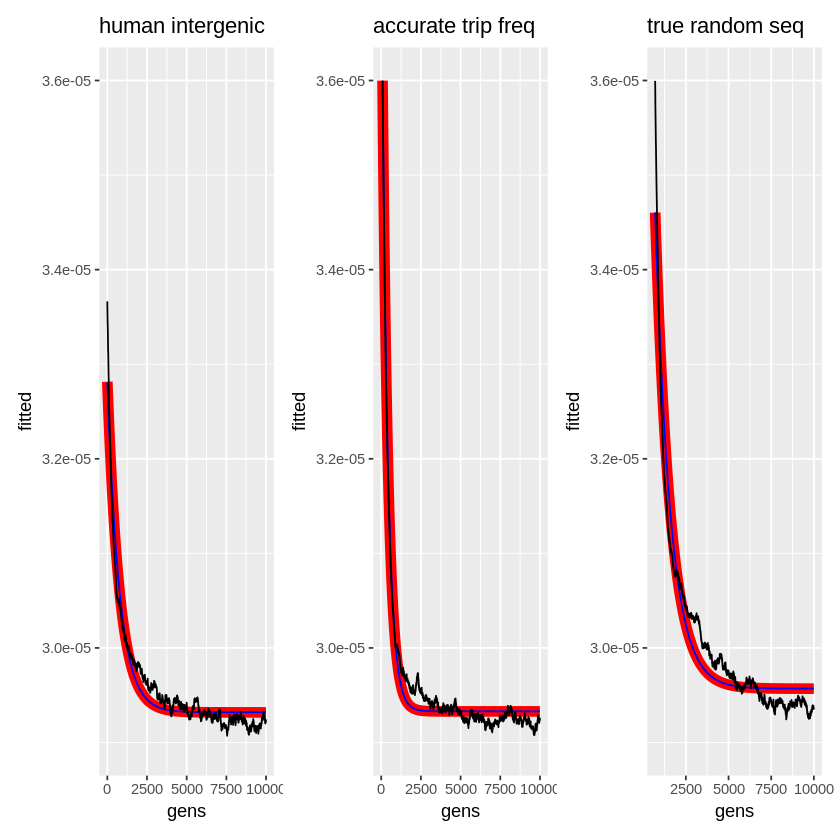

In [37]:
p1 <- ggplot(test_plotting_inter)+
    geom_line(aes(x=gens,y=fitted),color="red", size = 3)+
    geom_line(aes(x=gens,y=equation),color="blue")+
    geom_line(aes(x=gens,y=avMut),color="black")+
    ylim(2.9e-05, 3.6e-05)+
    labs(title="human intergenic")
p2<-ggplot(test_plotting_triprep)+
    geom_line(aes(x=gens,y=fitted),color="red", size = 3)+
    geom_line(aes(x=gens,y=equation),color="blue")+
    geom_line(aes(x=gens,y=avMut),color="black")+
    ylim(2.9e-05, 3.6e-05)+
    labs(title="accurate trip freq")
p3<-ggplot(test_plotting_random)+
    geom_line(aes(x=gens,y=fitted),color="red", size = 3)+
    geom_line(aes(x=gens,y=equation),color="blue")+
    geom_line(aes(x=gens,y=avMut),color="black")+
    ylim(2.9e-05, 3.6e-05)+
    labs(title="true random seq")
p1+p2+p3
# ggsave("plots/equationsMatchFitted.pdf")

## **now lets plot all them togetehr**

In [38]:
random_fitted <- 2.957e-05+(4.056e-05-2.957e-05)*exp(-0.00111489*all_data_tbl$gens)#use random equation on all data first 
# random_fitted_whole <- 2.997e-05+(6.244e-05-2.997e-05)*exp(-0.002233914*all_data_tbl$gens)

In [39]:
plotting_df <- all_data_tbl[,c("gens","random_avMut","triprep_avMut","inter_avMut")]

In [43]:
plotting_df$random_eqn <- random_fitted
# plotting_df$random_eqn_whole <- random_fitted_whole
plotting_df$triprep_eqn <- triprep_fitted
plotting_df$inter_eqn <- inter_fitted

In [44]:
plotting_df$random_lo <- all_data_tbl$random_avMut-all_data_tbl$random_stderrMut
plotting_df$random_hi <- all_data_tbl$random_avMut+all_data_tbl$random_stderrMut

plotting_df$triprep_lo <- all_data_tbl$triprep_avMut-all_data_tbl$triprep_stderrMut
plotting_df$triprep_hi <- all_data_tbl$triprep_avMut+all_data_tbl$triprep_stderrMut

plotting_df$inter_lo <- all_data_tbl$inter_avMut-all_data_tbl$inter_stderrMut
plotting_df$inter_hi <- all_data_tbl$inter_avMut+all_data_tbl$inter_stderrMut

In [45]:
long_plotting_df <- pivot_longer(plotting_df, cols=!gens , names_to="key" , values_to="values" )

In [46]:
long_plotting_df$class = NA
long_plotting_df$class[grep( "random" , long_plotting_df$key  )] = "random"
long_plotting_df$class[grep( "triprep" , long_plotting_df$key  )] = "triprep"
long_plotting_df$class[grep( "inter" , long_plotting_df$key  )] = "inter"

In [47]:
long_plotting_df1 <- long_plotting_df %>% 
    mutate(key = gsub("inter_", "", key)) %>% 
    mutate(key = gsub("random_", "", key)) %>% 
    mutate(key = gsub("triprep_", "", key)) %>% 
    pivot_wider(id_cols = c(gens, class), names_from = key, values_from = values)

In [48]:
head(long_plotting_df1)

gens,class,avMut,eqn,lo,hi
0,random,6.157891e-05,4.056000e-05,6.140923e-05,6.174859e-05
0,triprep,3.797823e-05,3.773000e-05,3.786833e-05,3.808813e-05
0,inter,3.366473e-05,3.281000e-05,3.318564e-05,3.414381e-05
1,random,6.150819e-05,4.054775e-05,6.133946e-05,6.167691e-05
1,triprep,3.794659e-05,3.770693e-05,3.783760e-05,3.805559e-05
1,inter,3.364314e-05,3.280546e-05,3.316516e-05,3.412111e-05


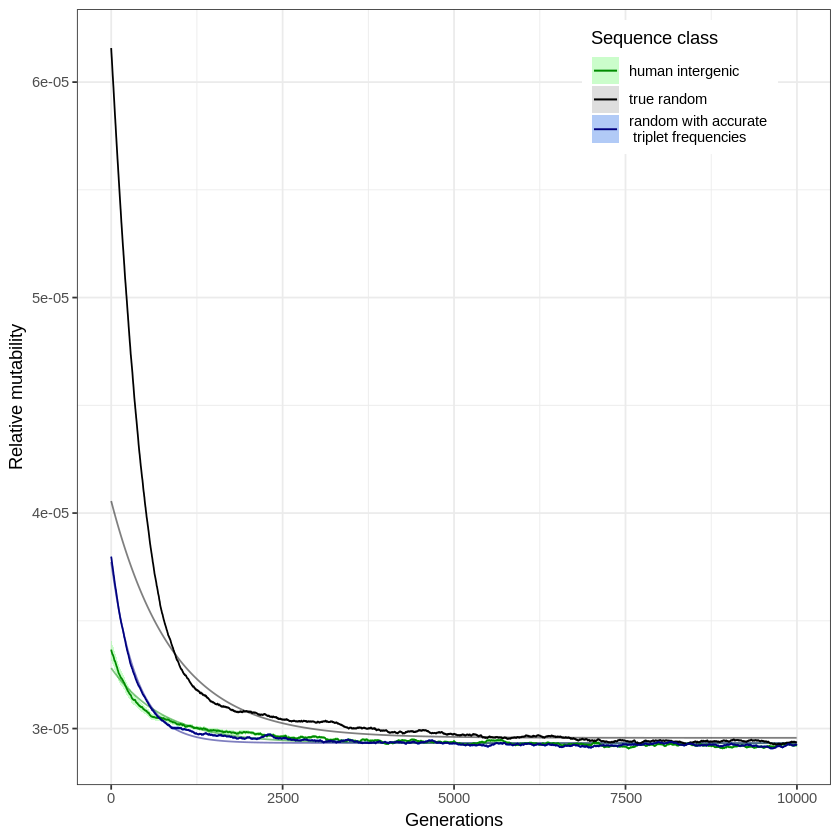

In [54]:
ggplot(long_plotting_df1) +
    geom_ribbon(aes(x=gens, ymin=lo, ymax=hi, fill = class), alpha=0.5) +
    geom_line(aes(x=gens, y=eqn, color = class), alpha=0.5) +
    geom_line(aes(x=gens, y=avMut, color = class)) +
    labs( y="Relative mutability" , x="Generations",color="Sequence class",fill="Sequence class")+
    scale_color_manual(labels=c(random = "true random", triprep = "random with accurate \n triplet frequencies", inter="human intergenic"),values = c(random = "black", triprep = "navy", inter="green4")) + 
    scale_fill_manual(labels=c(random = "true random", triprep = "random with accurate \n triplet frequencies", inter="human intergenic"),values = c(random = "grey", triprep = "cornflowerblue", inter="palegreen"))+
#     ylim(2.9e-05, 3.6e-05)+
    theme_bw()+
    theme(legend.position = c(0.8,0.9)) # http://www.sthda.com/english/wiki/ggplot2-legend-easy-steps-to-change-the-position-and-the-appearance-of-a-graph-legend-in-r-software
# ggsave("plots/allSeqClass_100n_5kbp_2xCov_stderr_fittedLines.pdf")

# **gettign equilibrium value**

In [51]:
gens = all_data_tbl$gens
random_derivative = -1.22526e-08*exp(-0.00111489*gens)